customer_id, unused variable.

credit_score, used as input.  
Puntuaje si el cliente se le da el puntuaje o no

country, used as input. 
Si viene en texto se suele poner en num si son pocos para clasificar  mejor

gender, used as input.

age, used as input.

tenure, used as input. Permanencia

balance, used as input. Saldo

products_number, used as input.

credit_card, used as input.

active_member, used as input.

estimated_salary, used as input.

churn, used as the target. 1 if the client has left the bank during some period or 0 if he/she has not.

Si vemos los graficos del kaggle, el id es rectangulo, no sirve, credir_score una normal, resto hsat tenure son categoricas, seiendo tenure triangular, balance no se, el reto tambine categoricas

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns

In [4]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [5]:
df = pd.read_csv("Bank Customer Churn Prediction.csv")


# Análisis exploraatorio de los datos
1. Exploración del data frame

a. Info

b. Describe

c. Nulos

d. Tipo de datos

e. Grafico rapido de datos (pairplot)

2. Análisis univariado

a. Análisis de credit score, country, gender, age... todas

    i. 

## 1. Exploracion de df

In [6]:
df.head()

customer_id  credit_score country  gender  age  tenure    balance  \
0     15634602           619  France  Female   42       2       0.00   
1     15647311           608   Spain  Female   41       1   83807.86   
2     15619304           502  France  Female   42       8  159660.80   
3     15701354           699  France  Female   39       1       0.00   
4     15737888           850   Spain  Female   43       2  125510.82   

   products_number  credit_card  active_member  estimated_salary  churn  
0                1            1              1         101348.88      1  
1                1            0              1         112542.58      0  
2                3            1              0         113931.57      1  
3                2            0              0          93826.63      0  
4                1            1              1          79084.10      0

In [7]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


customer_id  credit_score           age        tenure        balance  \
count  1.000000e+04  10000.000000  10000.000000  10000.000000   10000.000000   
mean   1.569094e+07    650.528800     38.921800      5.012800   76485.889288   
std    7.193619e+04     96.653299     10.487806      2.892174   62397.405202   
min    1.556570e+07    350.000000     18.000000      0.000000       0.000000   
25%    1.562853e+07    584.000000     32.000000      3.000000       0.000000   
50%    1.569074e+07    652.000000     37.000000      5.000000   97198.540000   
75%    1.575323e+07    718.000000     44.000000      7.000000  127644.240000   
max    1.581569e+07    850.000000     92.000000     10.000000  250898.090000   

       products_number  credit_card  active_member  estimated_salary  \
count     10000.000000  10000.00000   10000.000000      10000.000000   
mean          1.530200      0.70550       0.515100     100090.239881   
std           0.581654      0.45584       0.499797      57510.492818   
min           1.000000      0.00000       0.000000         11.580000   
25%           1.000000      0.00000       0.000000      51002.110000   
50%           1.000000      1.00000       1.000000     100193.915000   
75%           2.000000      1.00000       1.000000     149388.247500   
max           4.000000      1.00000       1.000000     199992.480000   

              churn  
count  10000.000000  
mean       0.203700  
std        0.402769  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000

In [8]:
df.isnull().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

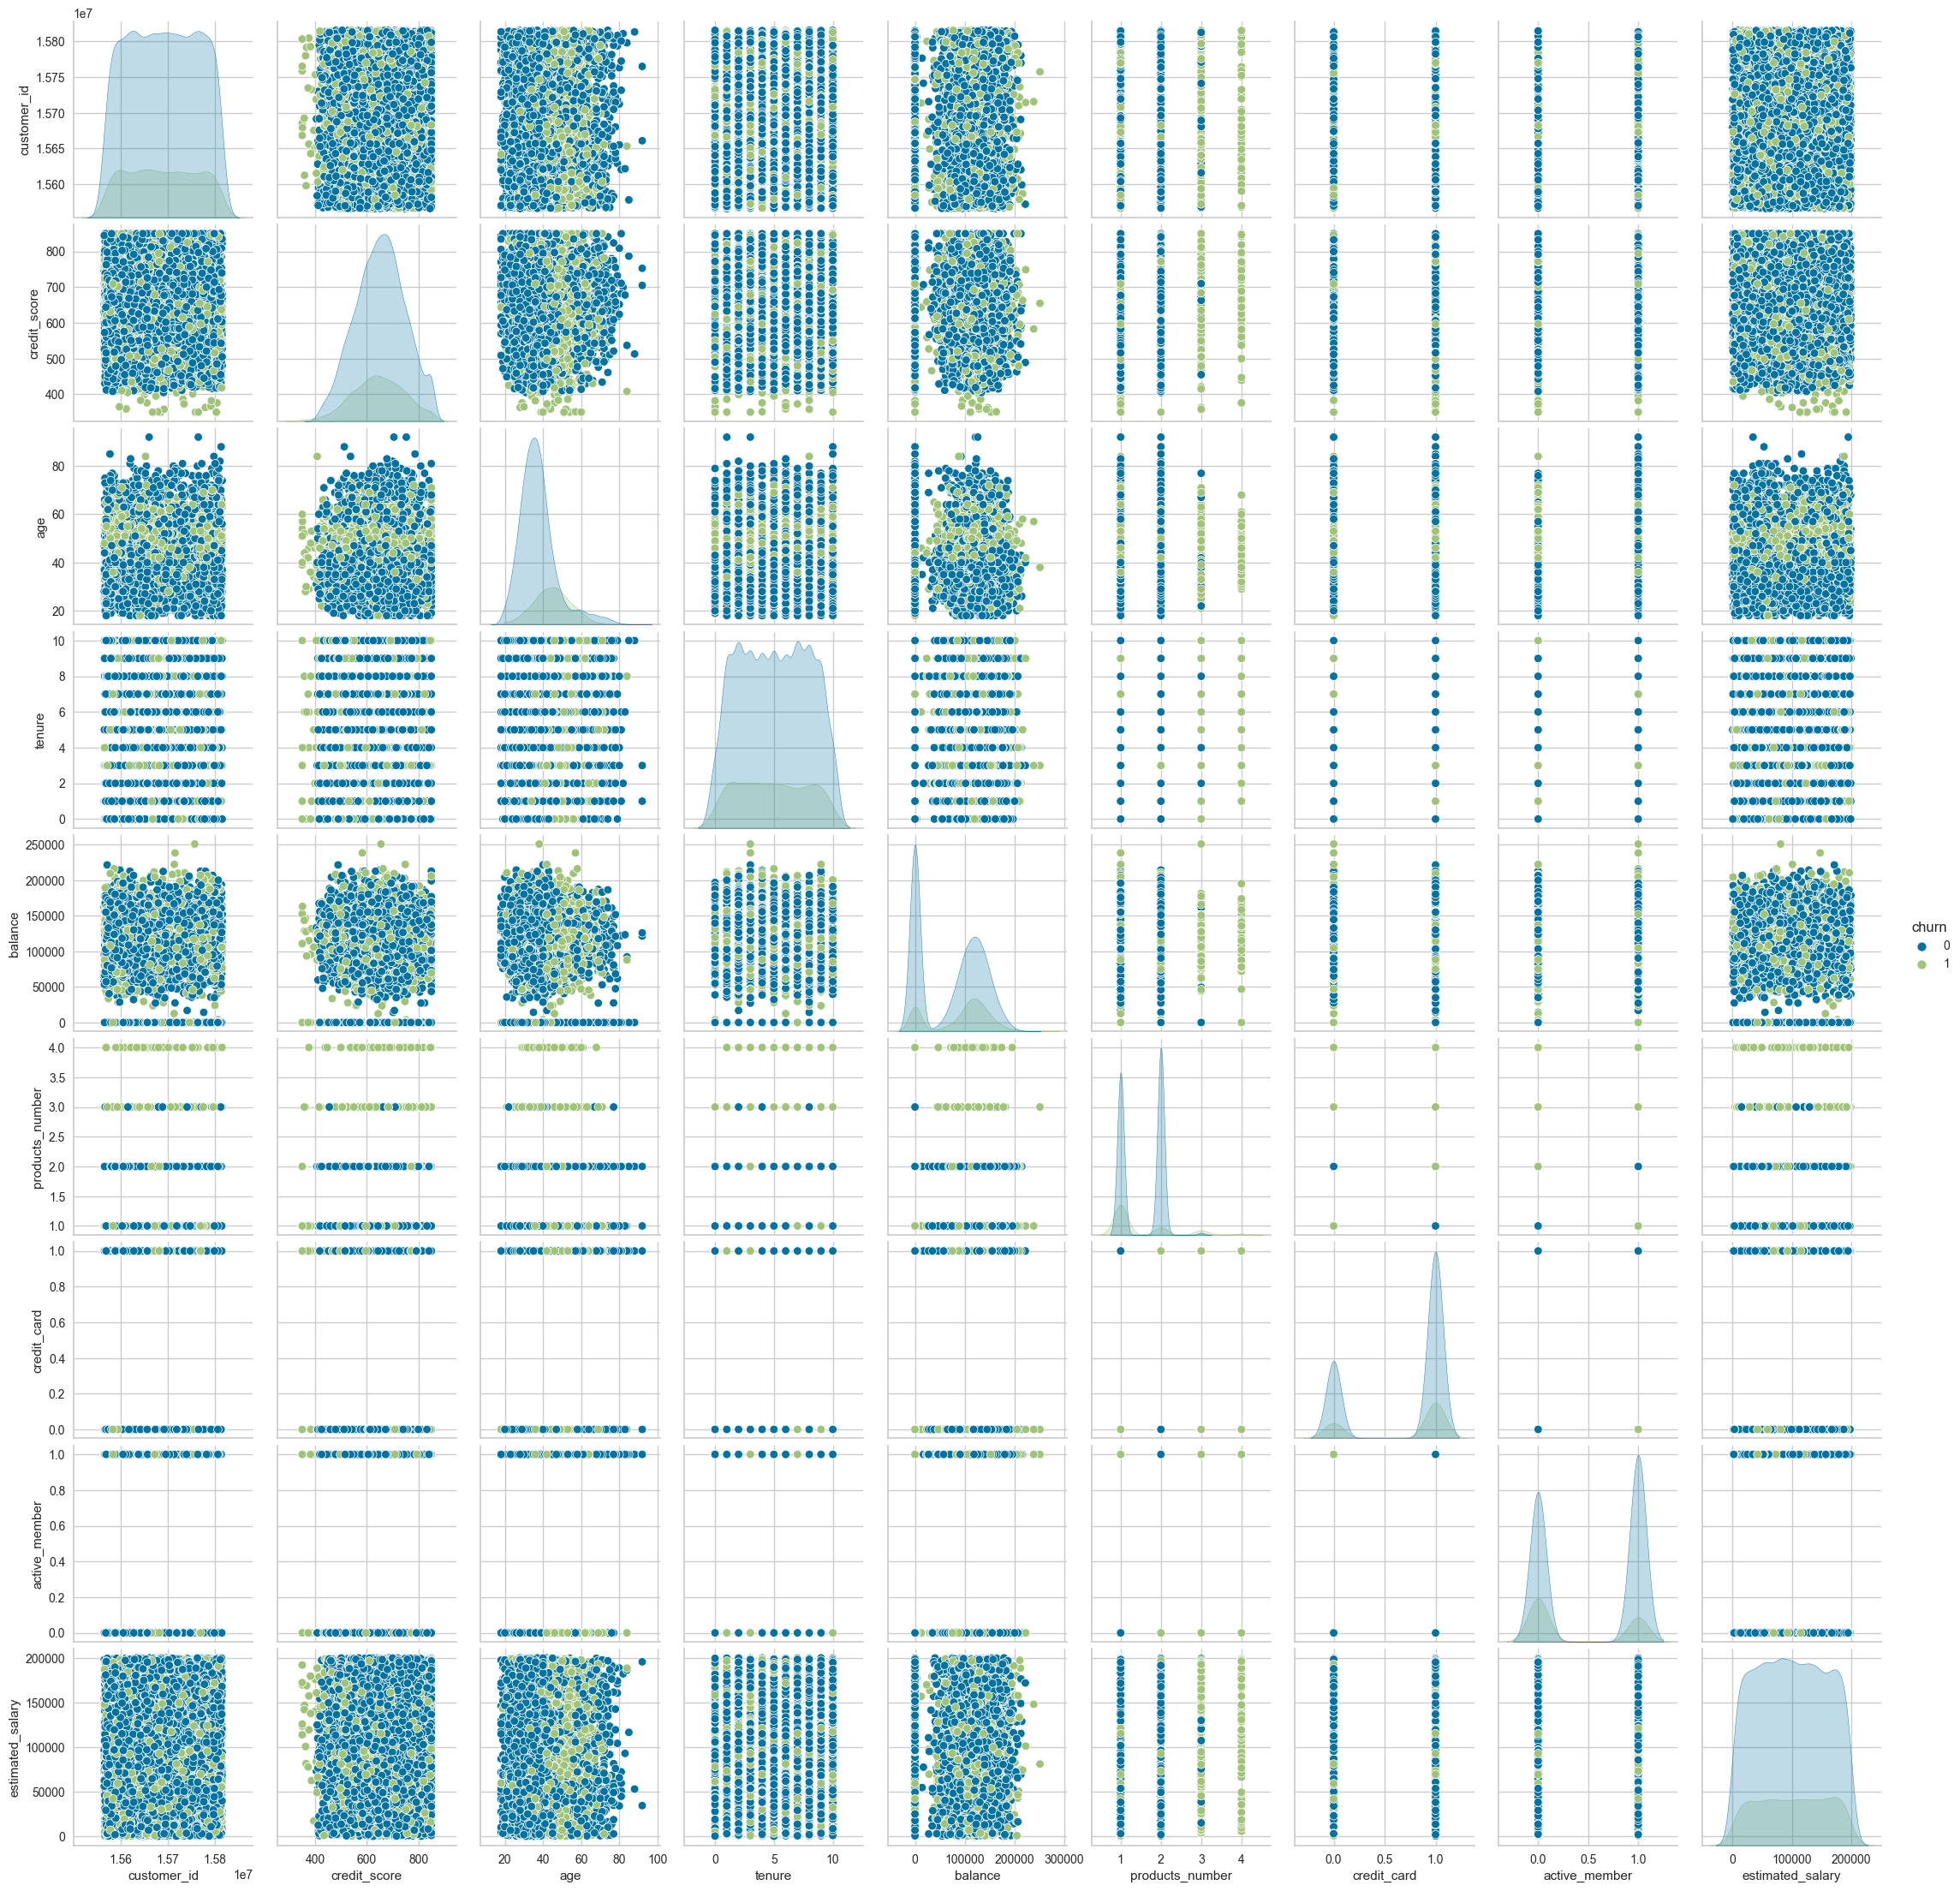

In [9]:
sns.pairplot(df, hue="churn")

* hemos observado que age y prodcut_number crean franjas o clasifican, al menos mas que el resto.

---------------------------------------------------------------------------------------------------------


## 2. Análisis univariado

In [10]:
df.columns

Index(['customer_id', 'credit_score', 'country', 'gender', 'age', 'tenure',
       'balance', 'products_number', 'credit_card', 'active_member',
       'estimated_salary', 'churn'],
      dtype='object')

In [11]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'credit_score')

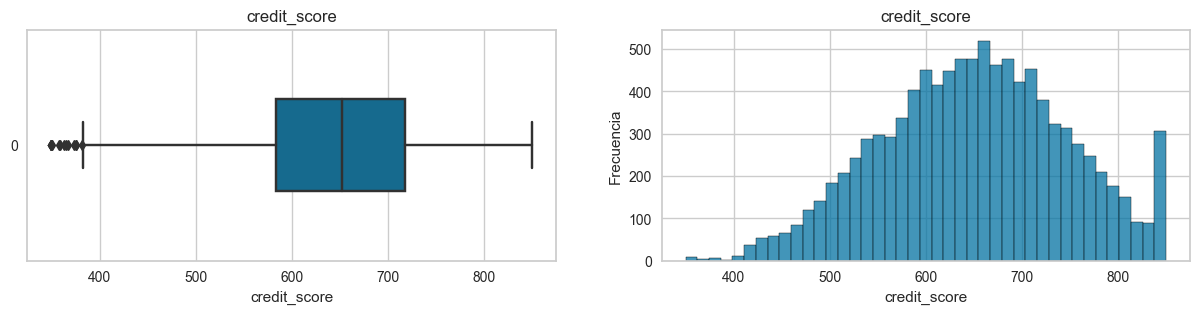

In [12]:
var = "credit_score"
var_title = var

fig, ax = plt.subplots(1,2,figsize=(15,3))

sns.boxplot(data=df[var], ax=ax[0], orient="h", width=0.4)
ax[0].set_xlabel(var_title)
ax[0].set_title(var)

sns.histplot(data=df[var], ax=ax[1], kde=False)
ax[1].set_xlabel(var_title)
ax[1].set_ylabel("Frecuencia")
ax[1].set_title(var)

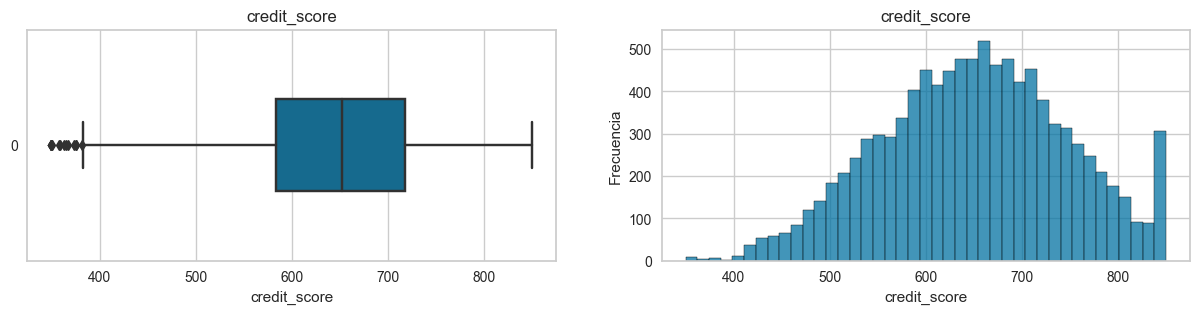

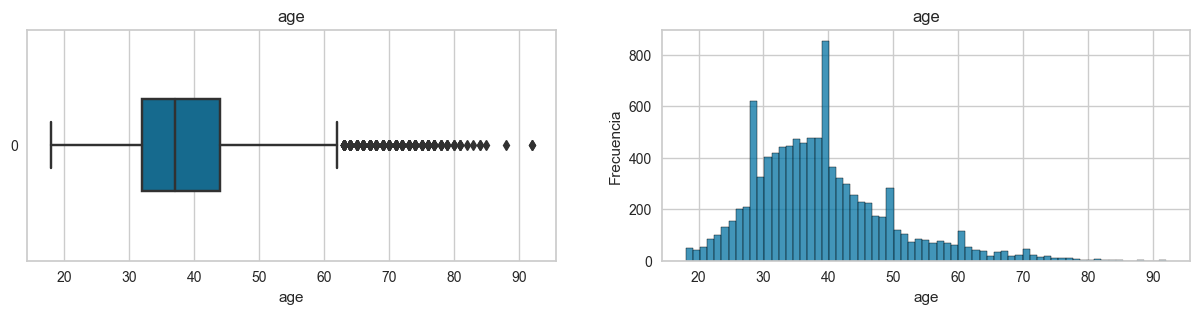

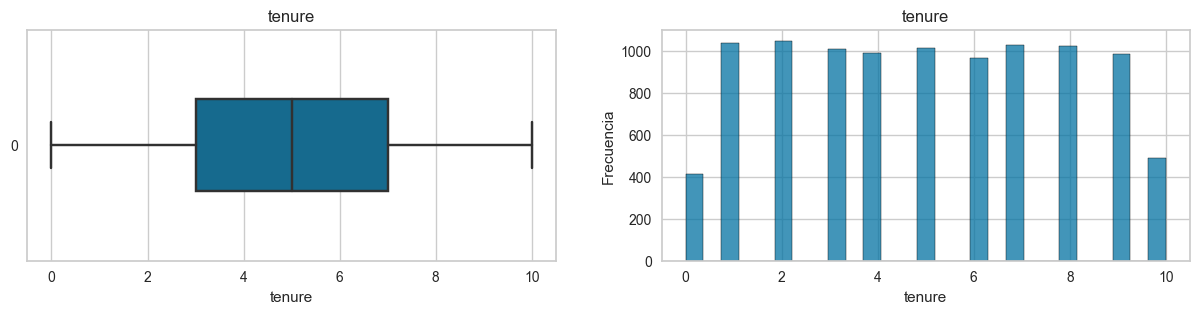

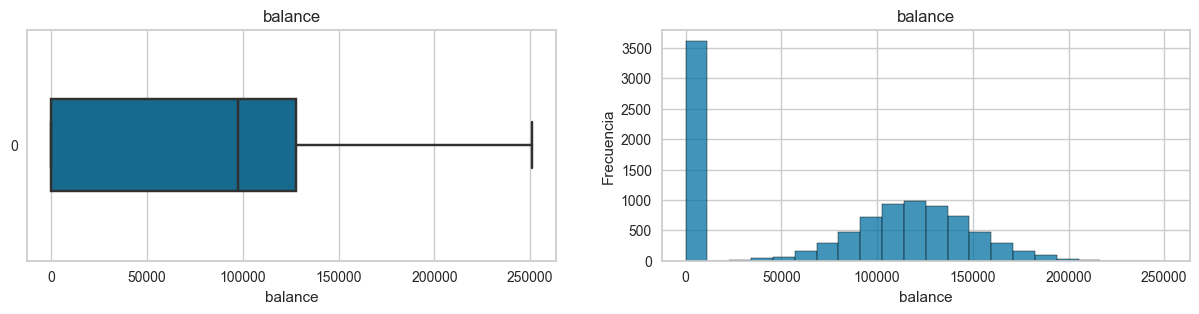

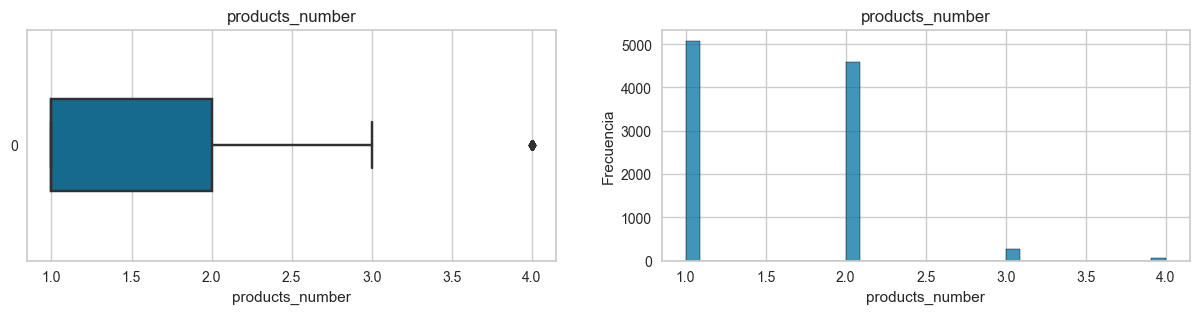

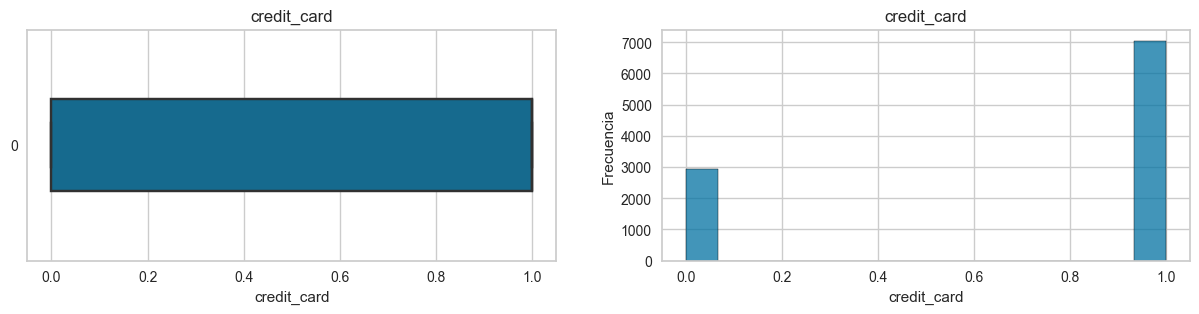

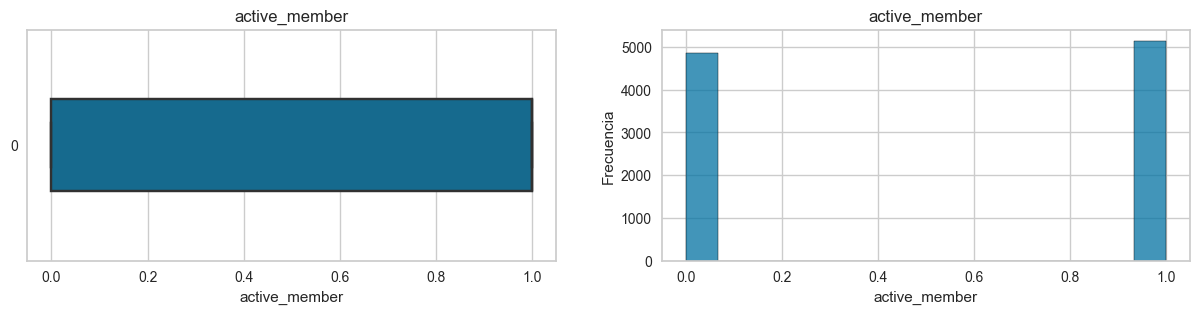

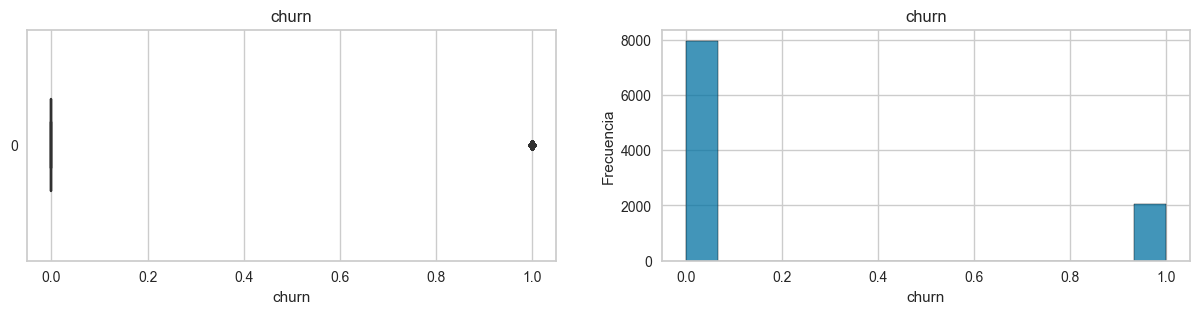

In [13]:
# quito los str que me dan error
df_num = df.drop(columns={"gender", "country"}, axis=1)

# quito las inservibles, que no me dicen nada
df_plots = df_num.drop(columns={"customer_id", "estimated_salary"}, axis=1)

columns = df_plots.columns
# columns = df.columns

for i in columns:
    var = i
    var_title = var

    fig, ax = plt.subplots(1,2,figsize=(15,3))

    sns.boxplot(data=df[var], ax=ax[0], orient="h", width=0.4)
    ax[0].set_xlabel(var_title)
    ax[0].set_title(var)

    sns.histplot(data=df[var], ax=ax[1], kde=False)
    ax[1].set_xlabel(var_title)
    ax[1].set_ylabel("Frecuencia")
    ax[1].set_title(var)

In [14]:
df["country"].replace(["France"],0, inplace=True)
df["country"].replace(["Spain"],1, inplace=True)
df["country"].replace(["Germany"],2, inplace=True)

df["gender"].replace(["Male"],0, inplace=True)
df["gender"].replace(["Female"],1, inplace=True)

df

customer_id  credit_score  country  gender  age  tenure    balance  \
0        15634602           619        0       1   42       2       0.00   
1        15647311           608        1       1   41       1   83807.86   
2        15619304           502        0       1   42       8  159660.80   
3        15701354           699        0       1   39       1       0.00   
4        15737888           850        1       1   43       2  125510.82   
...           ...           ...      ...     ...  ...     ...        ...   
9995     15606229           771        0       0   39       5       0.00   
9996     15569892           516        0       0   35      10   57369.61   
9997     15584532           709        0       1   36       7       0.00   
9998     15682355           772        2       0   42       3   75075.31   
9999     15628319           792        0       1   28       4  130142.79   

      products_number  credit_card  active_member  estimated_salary  churn  
0                   1            1              1         101348.88      1  
1                   1            0              1         112542.58      0  
2                   3            1              0         113931.57      1  
3                   2            0              0          93826.63      0  
4                   1            1              1          79084.10      0  
...               ...          ...            ...               ...    ...  
9995                2            1              0          96270.64      0  
9996                1            1              1         101699.77      0  
9997                1            0              1          42085.58      1  
9998                2            1              0          92888.52      1  
9999                1            1              0          38190.78      0  

[10000 rows x 12 columns]

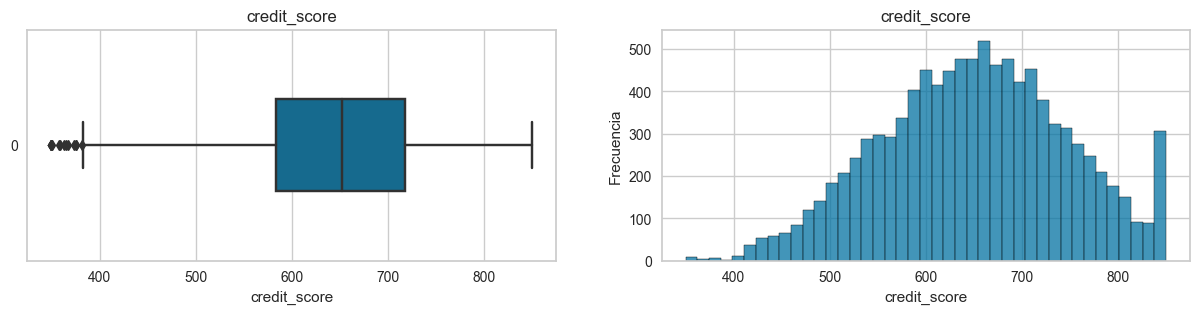

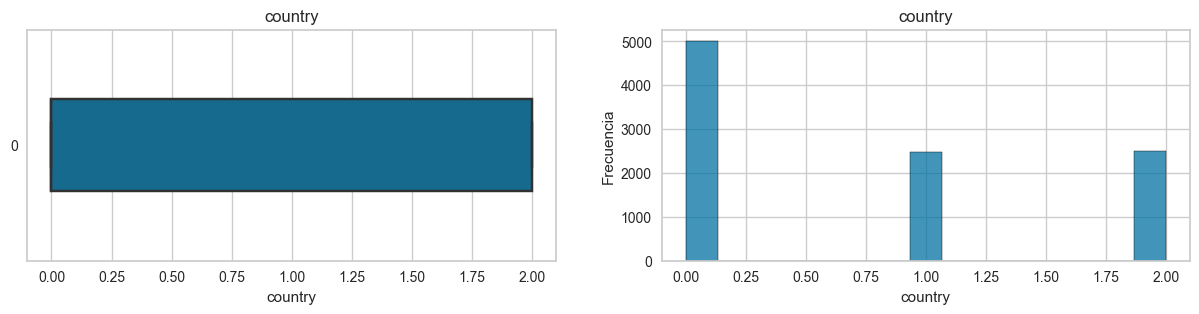

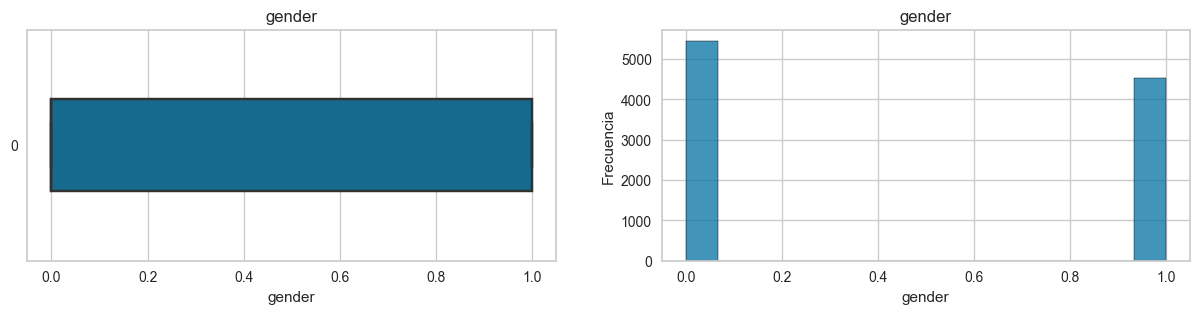

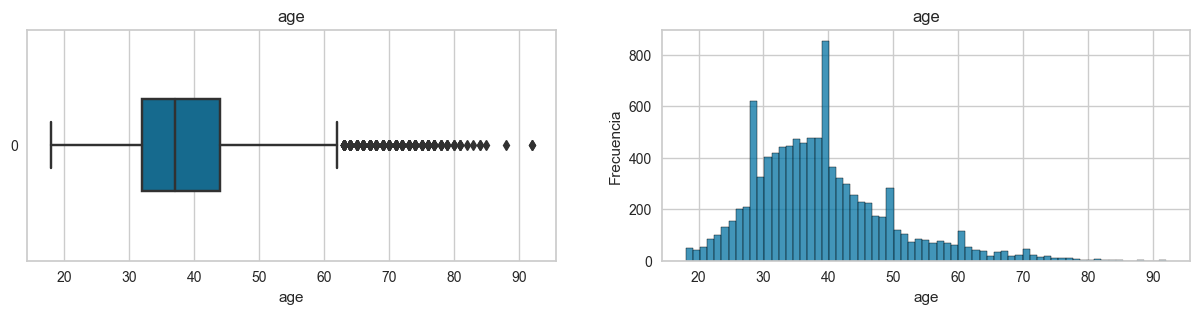

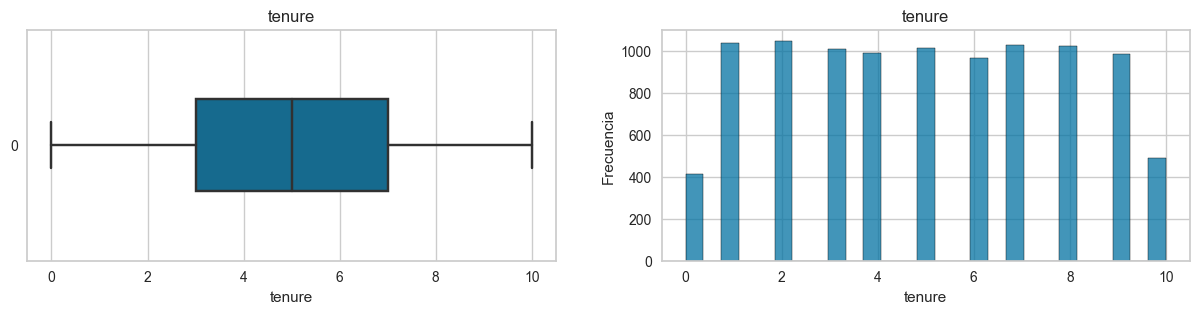

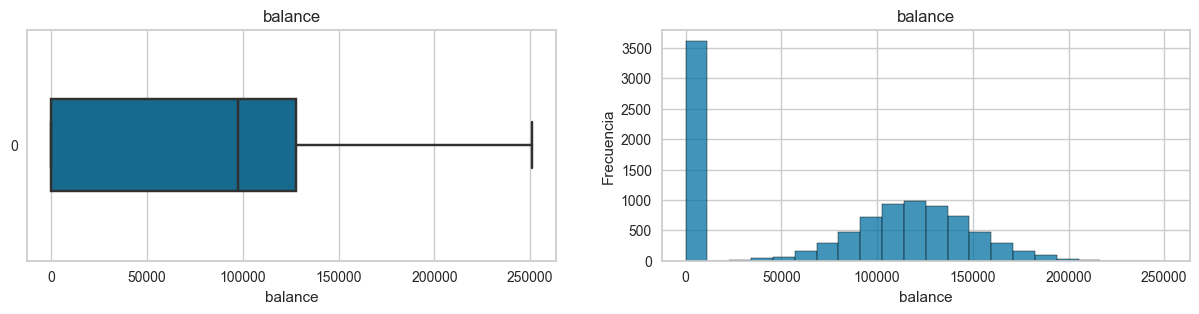

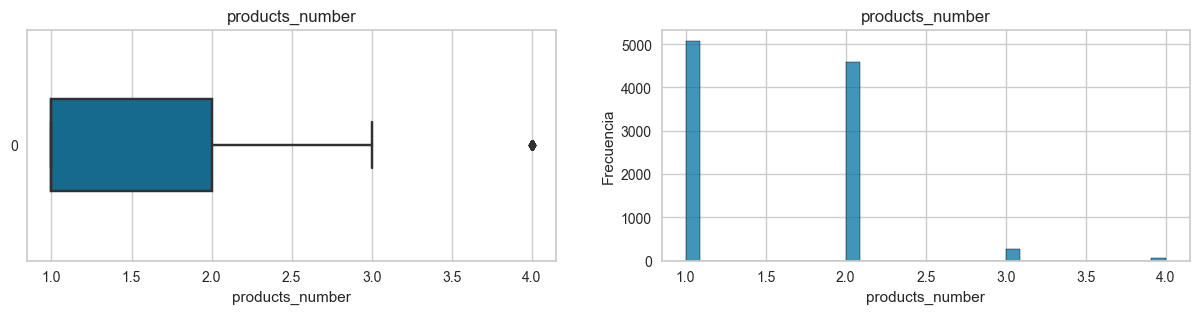

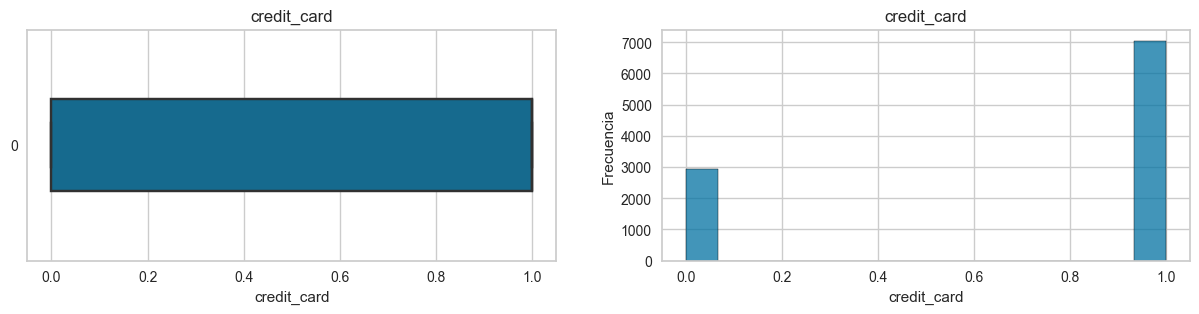

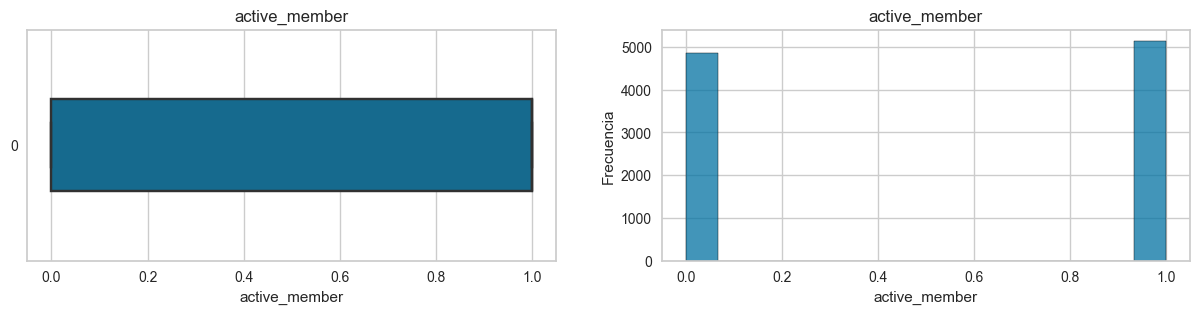

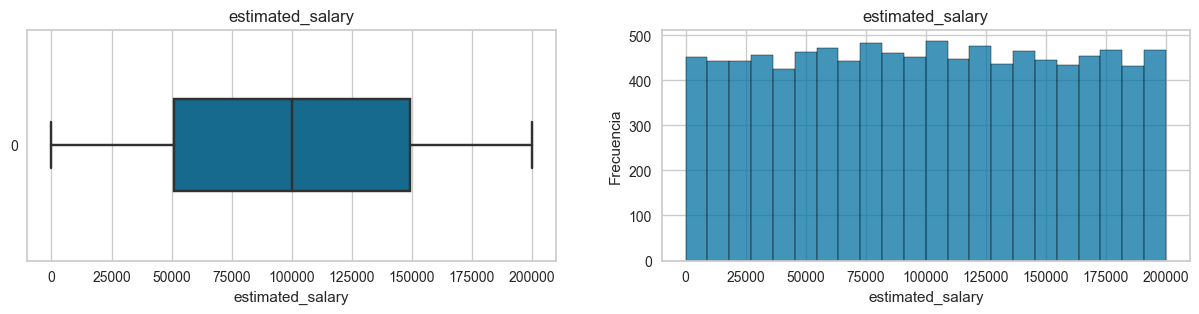

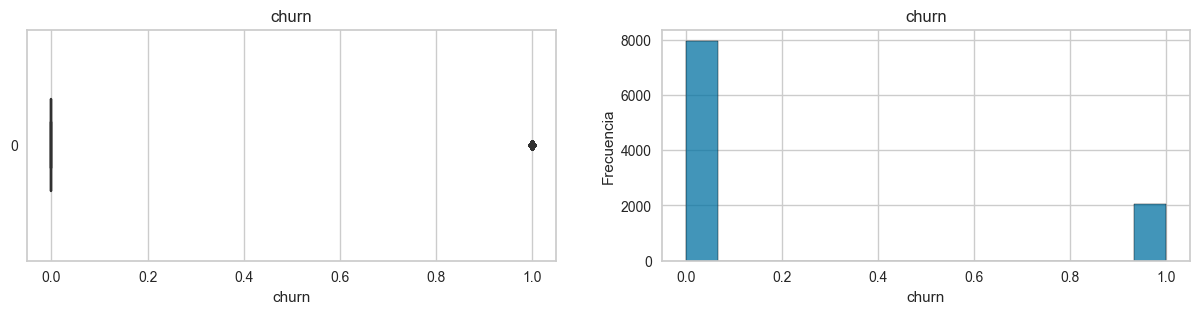

In [15]:
df_plots = df.drop(columns={"customer_id"}, axis=1)

columns = df_plots.columns
# columns = df.columns

for i in columns:
    var = i
    var_title = var

    fig, ax = plt.subplots(1,2,figsize=(15,3))

    sns.boxplot(data=df[var], ax=ax[0], orient="h", width=0.4)
    ax[0].set_xlabel(var_title)
    ax[0].set_title(var)

    sns.histplot(data=df[var], ax=ax[1], kde=False)
    ax[1].set_xlabel(var_title)
    ax[1].set_ylabel("Frecuencia")
    ax[1].set_title(var)

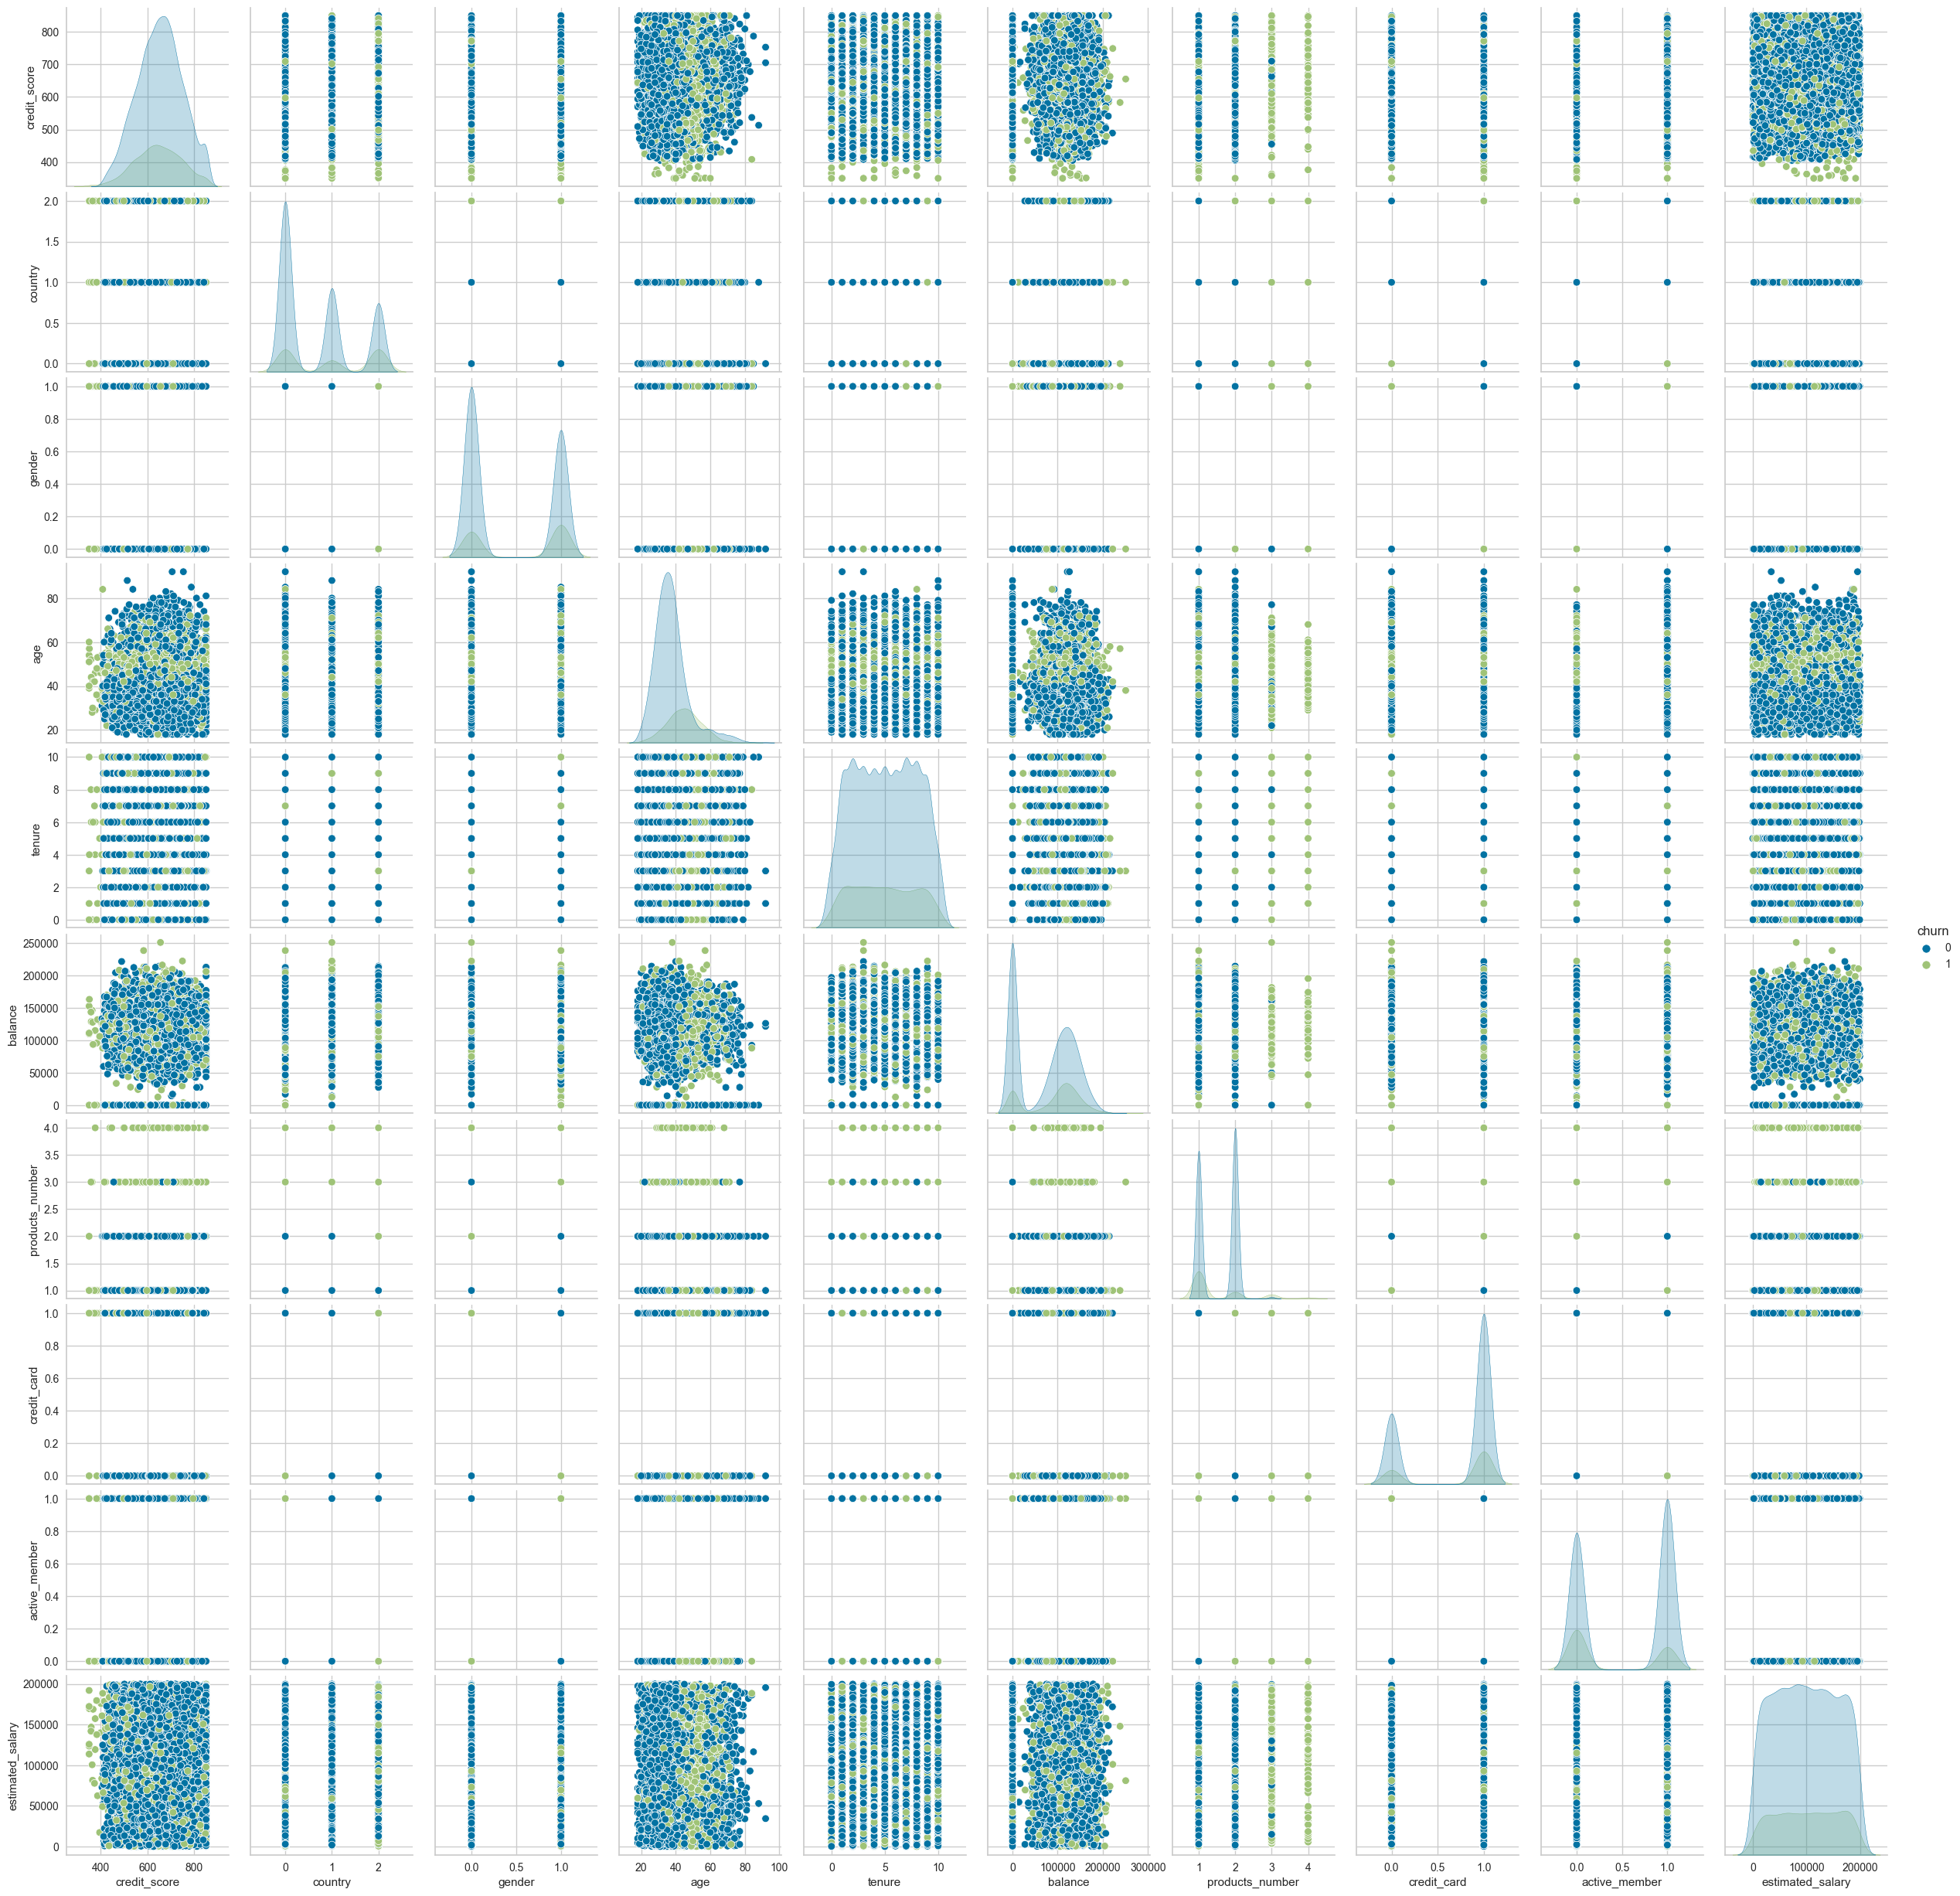

In [16]:
sns.pairplot(df_plots, hue="churn")

* variables donde se ve varianza y parecen ser importantes:
 age, product_number

* variables donde se ve estabilidad y parecen ser continuas:
 estimated_salary, actived_member, tenure, gender

* variables con variabilidad y que no se si son importates: 
  credit_score, credit_card, balance, country

<Axes: >

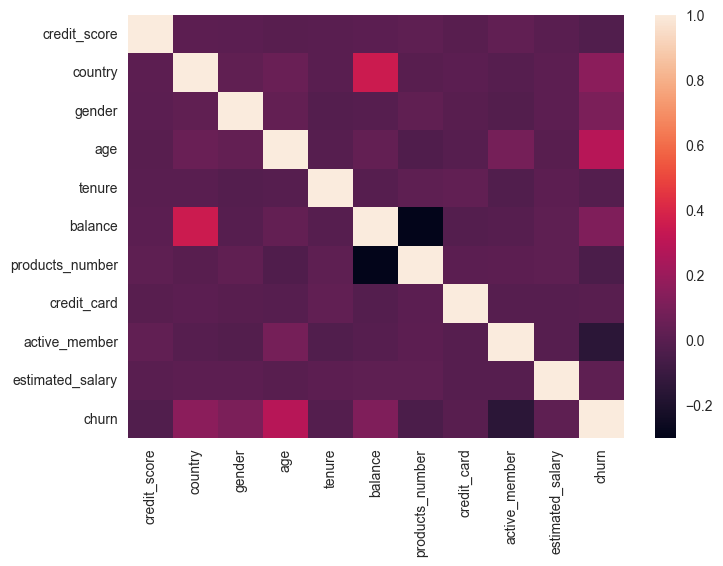

In [17]:
corrmat = df_plots.corr()

sns.heatmap(corrmat )

* balance y product_number son casi inversas

* y churn con prodct_number tiene algo de relacion, por lo que balance puede ser importante, y balnace junto con country tambien encontramos interes


## 3. Análisis multivariado

In [18]:
df.head()

customer_id  credit_score  country  gender  age  tenure    balance  \
0     15634602           619        0       1   42       2       0.00   
1     15647311           608        1       1   41       1   83807.86   
2     15619304           502        0       1   42       8  159660.80   
3     15701354           699        0       1   39       1       0.00   
4     15737888           850        1       1   43       2  125510.82   

   products_number  credit_card  active_member  estimated_salary  churn  
0                1            1              1         101348.88      1  
1                1            0              1         112542.58      0  
2                3            1              0         113931.57      1  
3                2            0              0          93826.63      0  
4                1            1              1          79084.10      0

In [19]:
df.dtypes
# todo nums

customer_id           int64
credit_score          int64
country               int64
gender                int64
age                   int64
tenure                int64
balance             float64
products_number       int64
credit_card           int64
active_member         int64
estimated_salary    float64
churn                 int64
dtype: object

In [20]:
filt1 = (df.churn==1)
data_abandona = df.drop(columns="customer_id").loc[filt1]

data_abandona.head()

credit_score  country  gender  age  tenure    balance  products_number  \
0            619        0       1   42       2       0.00                1   
2            502        0       1   42       8  159660.80                3   
5            645        1       0   44       8  113755.78                2   
7            376        2       1   29       4  115046.74                4   
16           653        2       0   58       1  132602.88                1   

    credit_card  active_member  estimated_salary  churn  
0             1              1         101348.88      1  
2             1              0         113931.57      1  
5             1              0         149756.71      1  
7             1              0         119346.88      1  
16            1              0           5097.67      1

In [21]:
filt2 = (df.churn==0)
data_no_abandona = df.drop(columns="customer_id").loc[filt2]

data_no_abandona.head()

credit_score  country  gender  age  tenure    balance  products_number  \
1           608        1       1   41       1   83807.86                1   
3           699        0       1   39       1       0.00                2   
4           850        1       1   43       2  125510.82                1   
6           822        0       0   50       7       0.00                2   
8           501        0       0   44       4  142051.07                2   

   credit_card  active_member  estimated_salary  churn  
1            0              1         112542.58      0  
3            0              0          93826.63      0  
4            1              1          79084.10      0  
6            1              1          10062.80      0  
8            0              1          74940.50      0

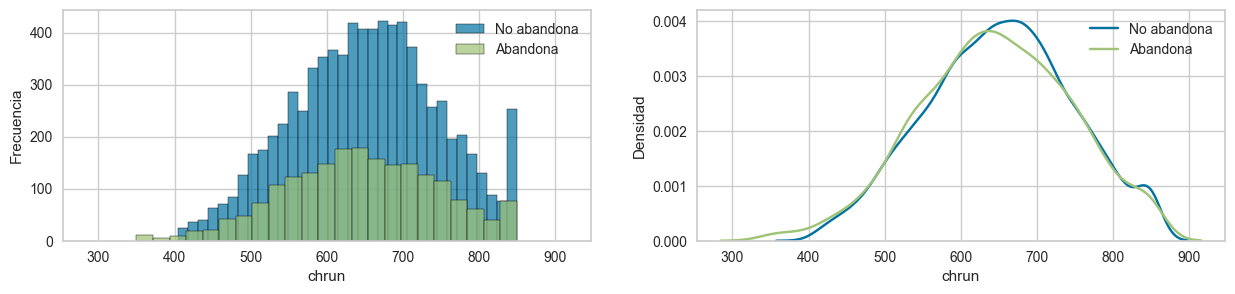

In [22]:
var = "credit_score"
var_title = "chrun"

fig, ax = plt.subplots(1,2,figsize=(15,3), sharex=True)
# sharex para que los ponga igual para comparar

# histograma para cada churn

sns.histplot(data=data_no_abandona, x=var, label="No abandona", kde=False, ax=ax[0], alpha=0.7)
sns.histplot(data=data_abandona, x=var, label="Abandona", kde=False, ax=ax[0], alpha=0.7)
ax[0].set_xlabel(var_title)
ax[0].set_ylabel("Frecuencia")
ax[0].legend()

# curva de densidad para cada churn
sns.kdeplot(data=data_no_abandona, x=var, label="No abandona", fill=False, ax=ax[1])
sns.kdeplot(data=data_abandona, x=var, label="Abandona", fill=False, ax=ax[1])
ax[1].set_xlabel(var_title)
ax[1].set_ylabel("Densidad")
ax[1].legend()

plt.show()

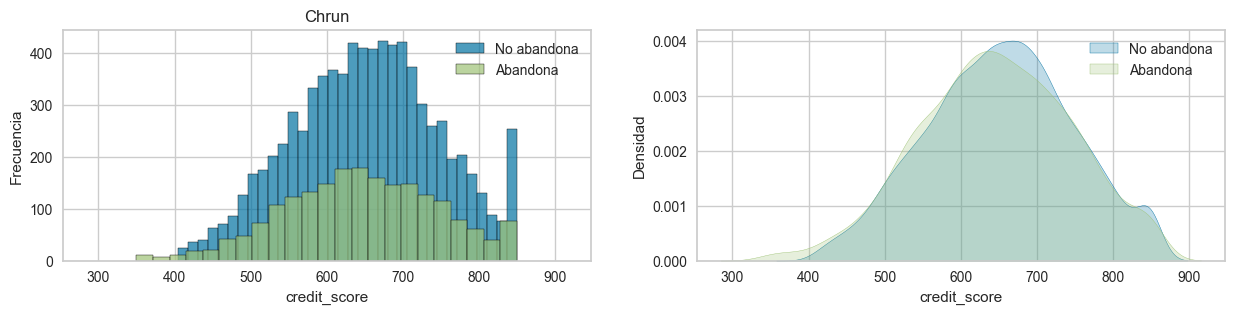

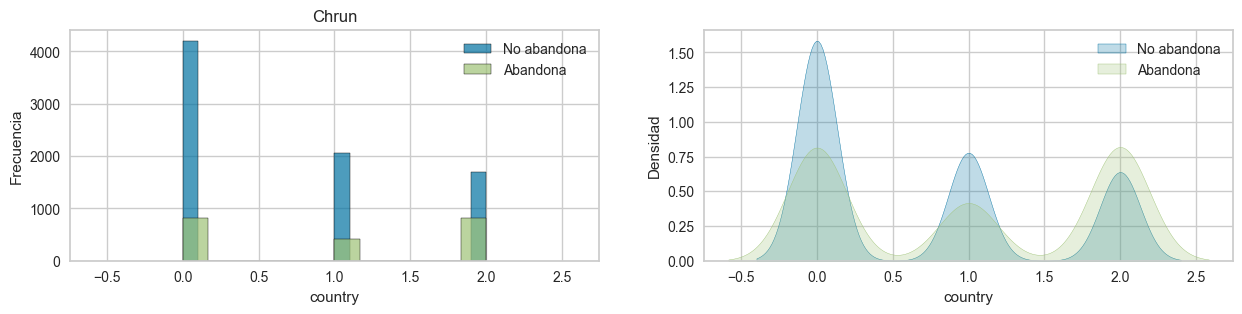

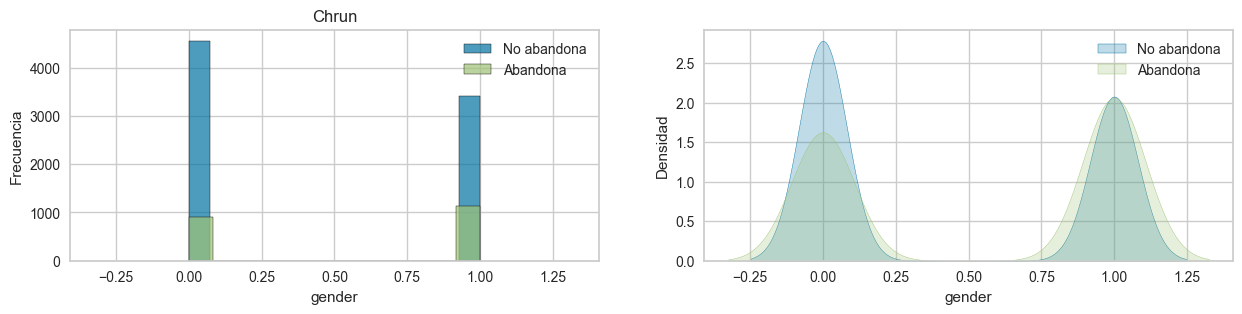

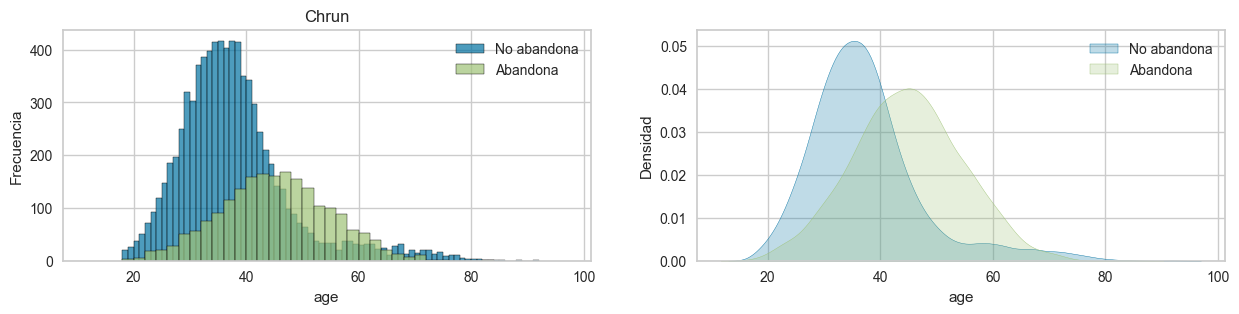

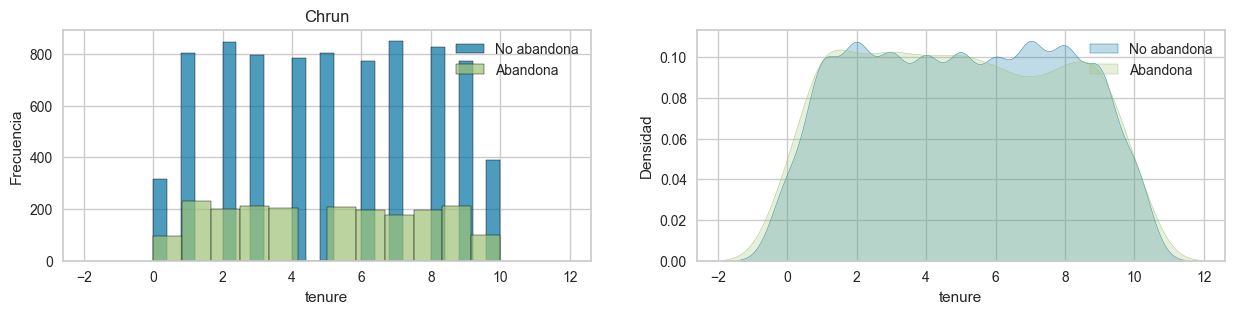

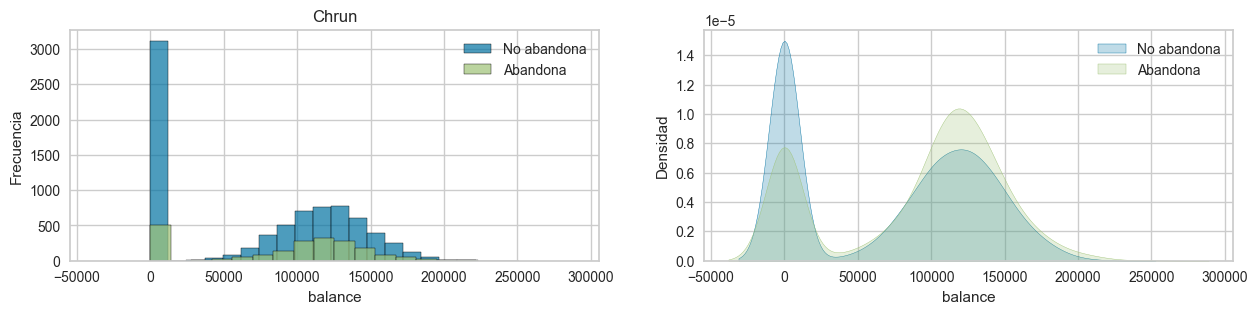

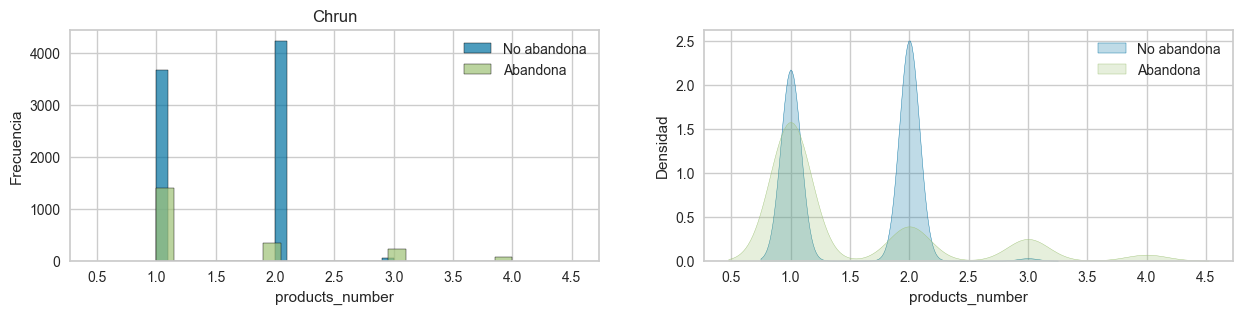

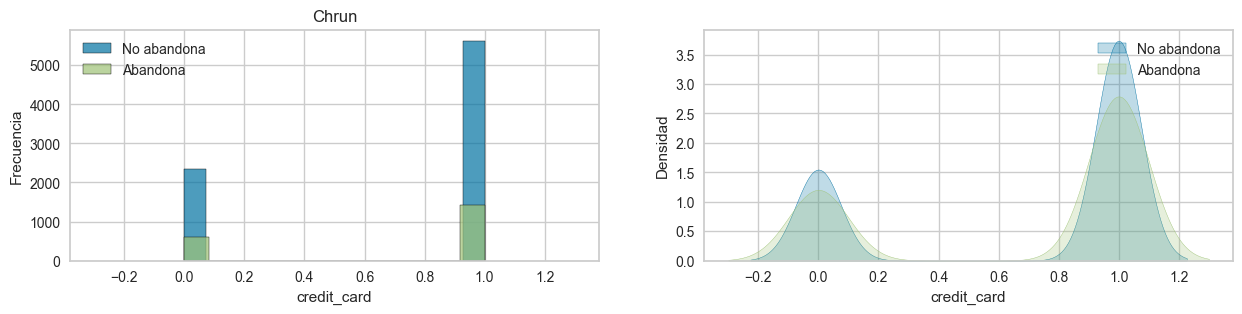

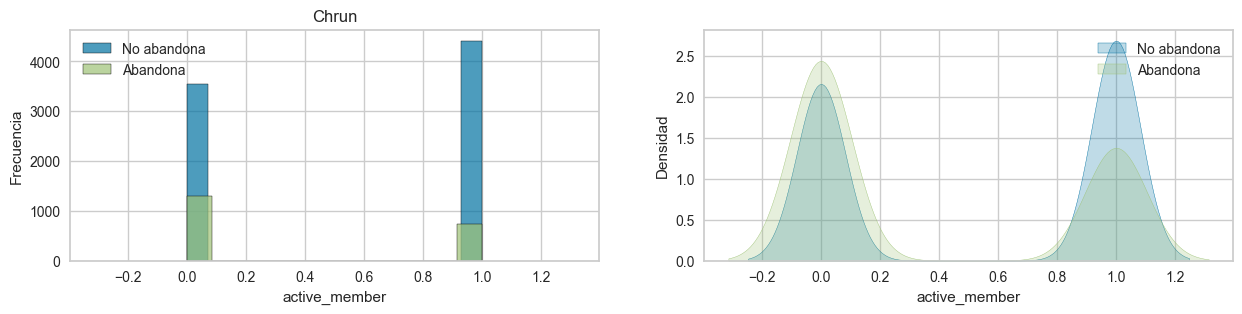

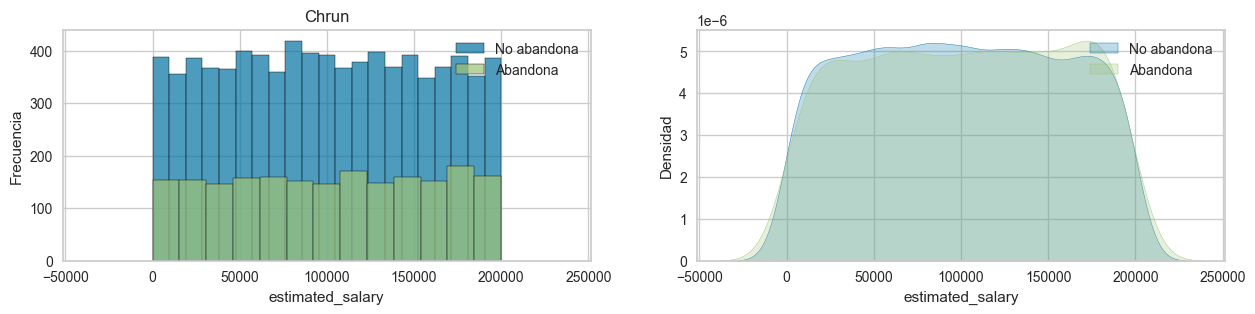

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


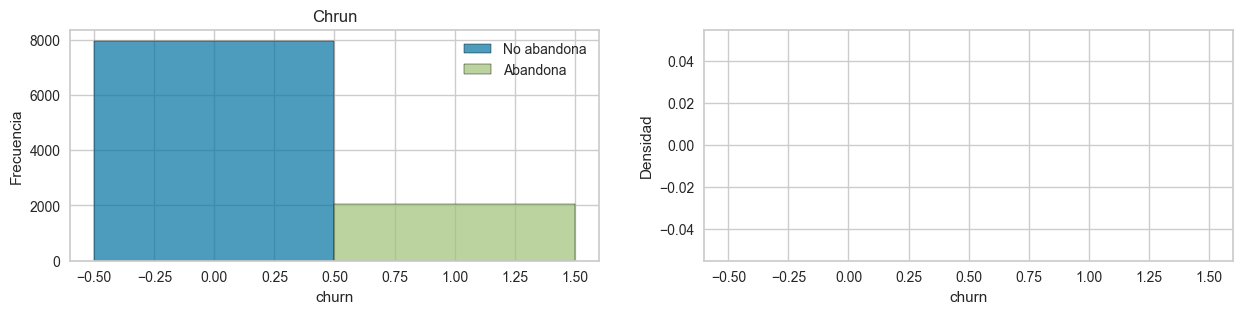

In [23]:
columns = data_no_abandona.columns

for i in columns:
    var = i
    var_title = var

    fig, ax = plt.subplots(1,2,figsize=(15,3), sharex=True)
    # sharex para que los ponga igual para comparar

    # histograma para cada churn

    sns.histplot(data=data_no_abandona, x=var, label="No abandona", kde=False, ax=ax[0], alpha=0.7)
    sns.histplot(data=data_abandona, x=var, label="Abandona", kde=False, ax=ax[0], alpha=0.7)
    ax[0].set_xlabel(var_title)
    ax[0].set_ylabel("Frecuencia")
    ax[0].set_title("Chrun")
    ax[0].legend()

    # curva de densidad para cada churn
    sns.kdeplot(data=data_no_abandona, x=var, label="No abandona", fill=True, ax=ax[1])
    sns.kdeplot(data=data_abandona, x=var, label="Abandona", fill=True, ax=ax[1])
    ax[1].set_xlabel(var_title)
    ax[1].set_ylabel("Densidad")
    ax[0].set_title("Chrun")
    ax[1].legend()

    plt.show()

In [24]:
df.drop(columns="customer_id", inplace=True)

In [25]:
df.corr(numeric_only=True)

credit_score   country    gender       age    tenure  \
credit_score          1.000000  0.008267  0.002857 -0.003965  0.000842   
country               0.008267  1.000000  0.016936  0.048092  0.001418   
gender                0.002857  0.016936  1.000000  0.027544 -0.014733   
age                  -0.003965  0.048092  0.027544  1.000000 -0.009997   
tenure                0.000842  0.001418 -0.014733 -0.009997  1.000000   
balance               0.006268  0.348700 -0.012087  0.028308 -0.012254   
products_number       0.012238 -0.006180  0.021859 -0.030680  0.013444   
credit_card          -0.005458  0.004036 -0.005766 -0.011721  0.022583   
active_member         0.025651 -0.012692 -0.022544  0.085472 -0.028362   
estimated_salary     -0.001384  0.007382  0.008112 -0.007201  0.007784   
churn                -0.027094  0.153771  0.106512  0.285323 -0.014001   

                   balance  products_number  credit_card  active_member  \
credit_score      0.006268         0.012238    -0.005458       0.025651   
country           0.348700        -0.006180     0.004036      -0.012692   
gender           -0.012087         0.021859    -0.005766      -0.022544   
age               0.028308        -0.030680    -0.011721       0.085472   
tenure           -0.012254         0.013444     0.022583      -0.028362   
balance           1.000000        -0.304180    -0.014858      -0.010084   
products_number  -0.304180         1.000000     0.003183       0.009612   
credit_card      -0.014858         0.003183     1.000000      -0.011866   
active_member    -0.010084         0.009612    -0.011866       1.000000   
estimated_salary  0.012797         0.014204    -0.009933      -0.011421   
churn             0.118533        -0.047820    -0.007138      -0.156128   

                  estimated_salary     churn  
credit_score             -0.001384 -0.027094  
country                   0.007382  0.153771  
gender                    0.008112  0.106512  
age                      -0.007201  0.285323  
tenure                    0.007784 -0.014001  
balance                   0.012797  0.118533  
products_number           0.014204 -0.047820  
credit_card              -0.009933 -0.007138  
active_member            -0.011421 -0.156128  
estimated_salary          1.000000  0.012097  
churn                     0.012097  1.000000

<Axes: >

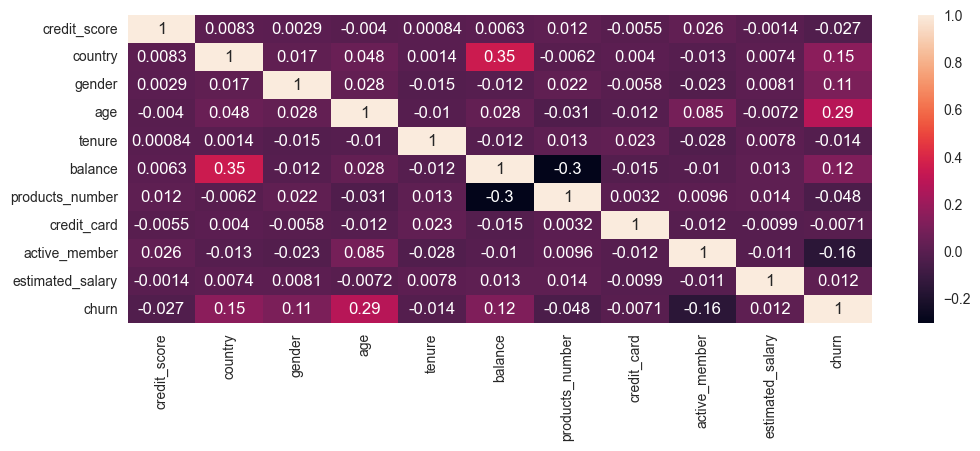

In [26]:
fig = plt.figure(figsize=(12,4))
sns.heatmap(df.corr(), annot=True)

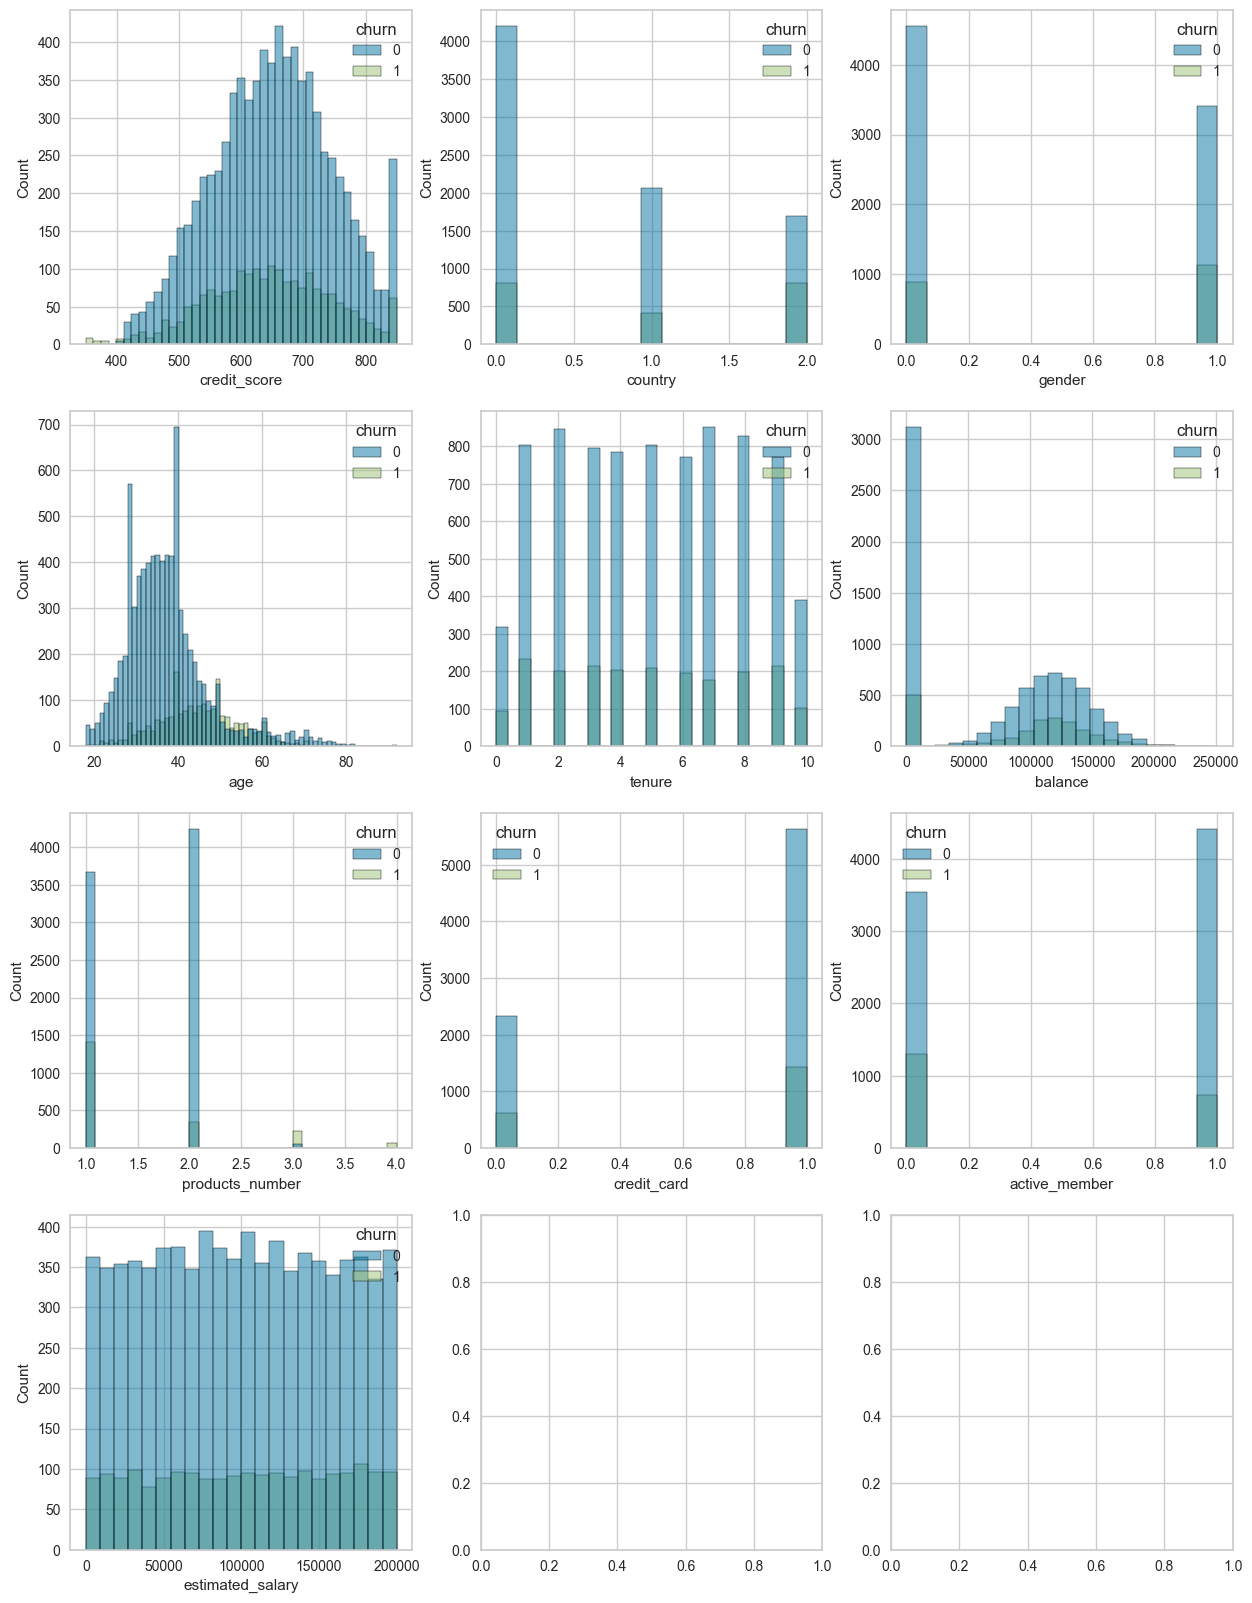

In [27]:
fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(15,20))
axs = axs.flat

for i in range(len(df.columns)-1):
    sns.histplot(data=df, x=df.columns[i], hue="churn", ax=axs[i])

## 4. Modelado

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


### RandomForest

In [29]:
X = df.drop("churn", axis=1)
y = df.churn

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=1)

In [30]:
classifier = RandomForestClassifier(n_estimators=100, criterion="gini",
                                    max_depth = None,
                                    min_samples_split=2,
                                    min_samples_leaf=1)
classifier.fit(X_train, y_train)

RandomForestClassifier()

In [31]:
y_pred = classifier.predict(X_test)
print("Accuracy", accuracy_score(y_test, y_pred))

Accuracy 0.8615


### RandomForest con StandarScaler

In [32]:
from sklearn.preprocessing import StandardScaler

In [33]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# si fueran precios, una variable continua la y tambine se escla, pero si es clasificacion no hace fakta

In [34]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [35]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [36]:
predictions = rfc.predict(X_test)
print("Accuracy", accuracy_score(y_test,predictions))

Accuracy 0.8635


In [47]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1585
           1       0.79      0.47      0.59       415

    accuracy                           0.86      2000
   macro avg       0.83      0.72      0.75      2000
weighted avg       0.86      0.86      0.85      2000



In [48]:
from pycaret.classification import *

In [53]:
s=setup (df, target="churn", train_size=.8, preprocess = False, transformation = False,
         remove_multicollinearity=True, multicollinearity_threshold = 0.9, feature_selection = True,
         fix_imbalance = True)

In [58]:
best_model = compare_models (sort="Accuracy")

Initiated  . . . . . . . . . . . . . . . . . .             17:32:23
Status     . . . . . . . . . . . . . . . . . .    Loading Estimator
Estimator  . . . . . . . . . . . . . . . . . .  Logistic Regression

Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [59]:
print(best_model)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=7222, reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)


In [60]:
tuned_best_model = tune_model(best_model)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


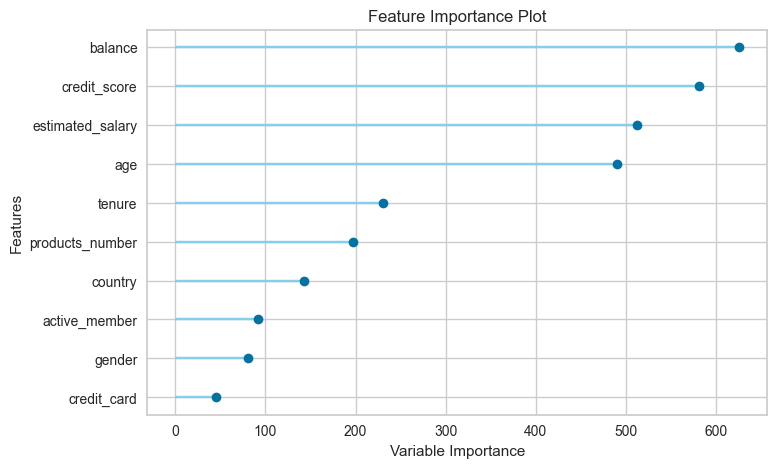

In [57]:
plot_model(best_model, plot="feature")